In [ ]:
import warnings #importing the library warnings
import itertools # importing the library itertools
import numpy as np # importing numpy library
import matplotlib.pyplot as plt # importing the matplotlibrary for plotting the graph used in visualization
warnings.filterwarnings("ignore") # for ignoring warnings.
plt.style.use('fivethirtyeight') # for applying font style 
import pandas as pd # for importing the pandas library.
import statsmodels.api as sm # for importing the statistical model API 
import matplotlib


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
data=pd.read_excel(r'K:\DATASETS\farm_Turbinepowerdata_10mins.xlsx')#for reading the dataset

In [ ]:
data.columns # for getting the columns.

Index(['time', 'farmpower'], dtype='object')

In [ ]:
data.head() # for getting first 6 rows

,time,farmpower
0,2020-01-01 00:00:00,145869
1,2020-01-01 00:10:00,160836
2,2020-01-01 00:20:00,139011
3,2020-01-01 00:30:00,124382
4,2020-01-01 00:40:00,152348


In [ ]:
data.tail() # For getting the last 6 rows.

,time,farmpower
457,2020-01-04 04:10:00,130887
458,2020-01-04 04:20:00,155219
459,2020-01-04 04:30:00,185945
460,2020-01-04 04:40:00,171849
461,2020-01-04 04:50:00,5773


In [ ]:
data.describe() # It is used to get the all caluculations of standard functions below.

,farmpower
count,462.000000
mean,147547.703463
std,18975.949883
min,5773.000000
25%,135869.250000
50%,149093.500000
75%,160750.250000
max,193905.000000


In [ ]:
data.info() # Gives information of our data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       462 non-null    datetime64[ns]
 1   farmpower  462 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.3 KB


In [ ]:
data.set_index('time',inplace=True) # used for changing column name 

In [ ]:
y=data

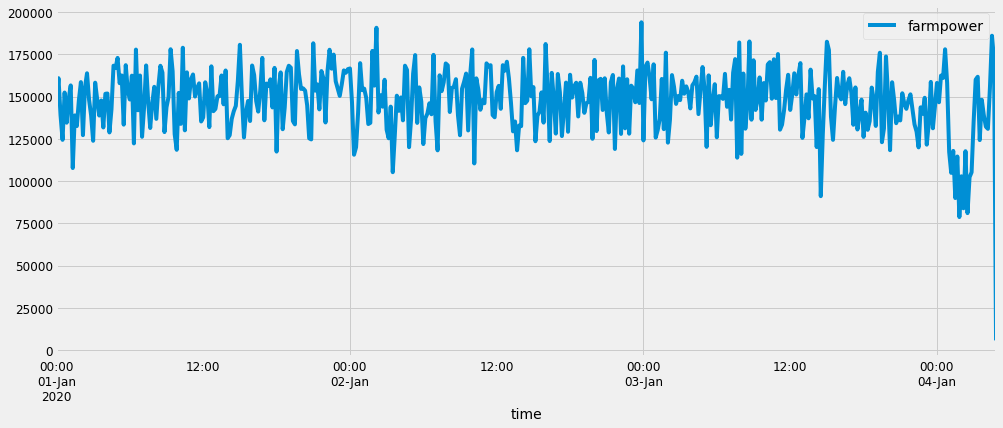

In [ ]:
data.plot(figsize=(15, 6)) # plot thegraph
plt.show()

In [ ]:
p = d = q = range(0, 2) # Implementation of ARIMA Algorithm
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12291.404353141035
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11680.395212656835
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10375.679413866717
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10000.139716088932
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10396.849170336613
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10354.576524841788
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10009.084333504923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9982.47292334654
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11957.964369355434
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11568.871913839996
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10339.860863004138
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:9973.243379295418
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11562.817150472727
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11512.022527186691
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10019.75139674664
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:9968.3377152212
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10606.739953941793
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10326.270576946263

In [ ]:

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0366      0.067      0.543      0.587      -0.095       0.169
ma.L1         -0.8622      0.024    -36.144      0.000      -0.909      -0.815
ar.S.L12      -0.4870      0.064     -7.618      0.000      -0.612      -0.362
sigma2      7.176e+08   2.39e-11      3e+19      0.000    7.18e+08    7.18e+08


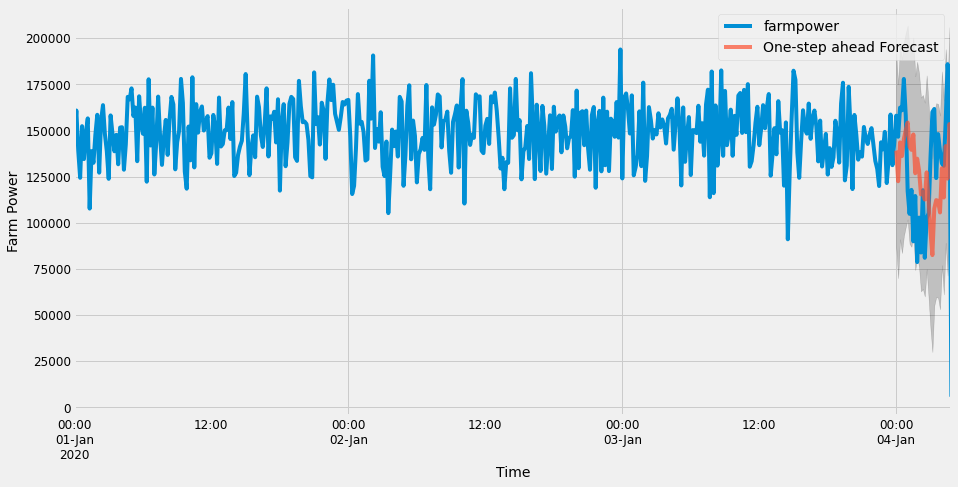

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-04 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020-01-01 00:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('Farm Power')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as st # Importing scipy package for getting Confidence band values.

#create 95% confidence interval for turbine mean power
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(array([145817.36672831]), array([149278.0401981]))

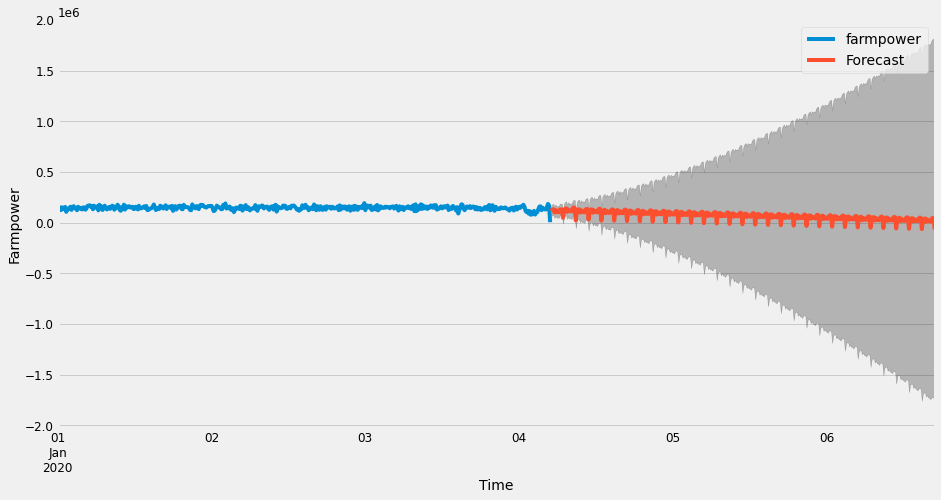

In [ ]:
pred_uc = results.get_forecast(steps=360) # Finally forecasting the power for Next 6 hours 
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('Farmpower')
plt.legend()
plt.show()